In [150]:
############################## can we decide between task related and MW ? ############################

# only two categorries

## Dependencies

# Import package/module for data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import modules for feature engineering and modelling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

# pipeline
from imblearn.pipeline import Pipeline

# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

# cross validation and hyperparameter tuning
from sklearn.model_selection import StratifiedGroupKFold,  GridSearchCV

# balancing
from imblearn.over_sampling import RandomOverSampler, SMOTE

#accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

#feature selection
from sklearn import set_config
from sklearn.feature_selection import SelectKBest, chi2

In [69]:
#read_path_awareness = r"W:\WCT\04_Mind-Wandering-Labstudy\04_Daten\04_Prepared_data\00_Julia\Model Building\features_with_label_awareness.csv"
read_path = r"C:\Users\Julia\Desktop\features_with_labels.csv"# r"W:\WCT\04_Mind-Wandering-Labstudy\04_Daten\04_Prepared_data\00_Julia\Model Building\features_with_labels.csv"
df = pd.read_csv(read_path)

In [70]:
#df["Awareness_all"].unique()
df["Awareness_all"].value_counts()

task-related    631
aware           249
unaware         147
Name: Awareness_all, dtype: int64

In [71]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df["Awareness_all_new"] = labelencoder.fit_transform(df["Awareness_all"])
df["Awareness_all_new"].unique()

array([1, 0, 2])

In [72]:
df["Awareness_all_new"].value_counts()
# 1 = task related, 0 aware 2 unaware

1    631
0    249
2    147
Name: Awareness_all_new, dtype: int64

In [73]:
# df["Awareness_all_new"] =  df["Awareness_all_new"].replace(0,3)
# df["Awareness_all_new"] =  df["Awareness_all_new"].replace(1,4)
# df["Awareness_all_new"] =  df["Awareness_all_new"].replace(2,1)
# df["Awareness_all_new"] =  df["Awareness_all_new"].replace(3,1)
# df["Awareness_all_new"] =  df["Awareness_all_new"].replace(4, 0)
# df["Awareness_all_new"].value_counts()

# # 0 task- related
# # 1 MW

In [74]:
df["Awareness_all_new"] =  df["Awareness_all_new"].replace(2,0)
df["Awareness_all_new"].value_counts()
# 1 task related
# 0 MW

1    631
0    396
Name: Awareness_all_new, dtype: int64

In [75]:
# df["Awareness_all_cat"].unique()
# # to get only two categories
# df["Awareness_all_cat"] =  df["Awareness_all_cat"].replace(3,2)
# df["Awareness_all_cat"] =  df["Awareness_all_cat"].replace(1,0)
# df["Awareness_all_cat"] =  df["Awareness_all_cat"].replace(2,1)
# df["Awareness_all_cat"]

In [76]:
# ['task-related' == 1 , 'aware' == 2, 'unaware' == 3 , nan == delete the row]
def get_X_y(train):
    FEATURES = [
        'Fixation Duration Mean [ms]', 'Fixation Duration Max [ms]', 'Fixation Duration Min [ms]', 'Fixation Duration Median [ms]', 'Fixation Duration Std [ms]', 'Fixation Duration Skew [ms]', 'Fixation Duration Quantil 25 [ms]', 'Fixation Duration Quantil 75 [ms]',
        'Saccade Duration Mean [ms]', 'Saccade Duration Max [ms]', 'Saccade Duration Min [ms]', 'Saccade Duration Median [ms]', 'Saccade Duration Std [ms]', 'Saccade Duration Skew [ms]', 'Saccade Duration Quantil 25 [ms]', 'Saccade Duration Quantil 75 [ms]', 
        'Blink Duration Mean [ms]', 'Blink Duration Max [ms]', 'Blink Duration Min [ms]', 'Blink Duration Median [ms]', 'Blink Duration Std [ms]', 'Blink Duration Skew [ms]', 'Blink Duration Quantil 25 [ms]', 'Blink Duration Quantil 75 [ms]', 'Fixation Duration Kurtosis [ms]',
        'Saccade Duration Kurtosis [ms]',
        'Blink Duration Kurtosis [ms]', 
        'Fixation Saccade Ratio Mean', 'Fixation Saccade Ratio Max', 'Fixation Saccade Ratio Min', 'Fixation Saccade Ratio Median', 'Fixation Saccade Ratio Std', 'Fixation Saccade Ratio Skew', 'Fixation Saccade Ratio Kurtosis', 
        'Fixation Number', 'Blink Number', 
        'Fixation Dispersion X Mean [px]', 'Fixation Dispersion X Max [px]', 'Fixation Dispersion X Min [px]', 'Fixation Dispersion X Median [px]', 'Fixation Dispersion X Std [px]', 'Fixation Dispersion X Skew [px]', 'Fixation Dispersion X Quantil 25 [px]', 'Fixation Dispersion X Quantil 75 [px]', 
        'Fixation Dispersion Y Mean [px]', 'Fixation Dispersion Y Max [px]', 'Fixation Dispersion Y Min [px]', 'Fixation Dispersion Y Median [px]', 'Fixation Dispersion Y Std [px]', 'Fixation Dispersion Y Skew [px]', 'Fixation Dispersion Y Quantil 25 [px]', 'Fixation Dispersion Y Quantil 75 [px]', 'Fixation Dispersion X Kurtosis [px]', 'Fixation Dispersion Y Kurtosis [px]', 
        'Saccade Amplitude Mean [°]', 'Saccade Amplitude Max [°]', 'Saccade Amplitude Min [°]', 'Saccade Amplitude Median [°]', 'Saccade Amplitude Std [°]', 'Saccade Amplitude Skew [°]', 'Saccade Amplitude Quantil 25 [°]', 'Saccade Amplitude Quantil 75 [°]', 'Saccade Amplitude Kurtosis [°]',
        'Saccade Acceleration Average [°/s²] Mean', 'Saccade Acceleration Average [°/s²] Max', 'Saccade Acceleration Average [°/s²] Min', 'Saccade Acceleration Average [°/s²] Median', 'Saccade Acceleration Average [°/s²] Std', 'Saccade Acceleration Average [°/s²] Skew]', 'Saccade Acceleration Average [°/s²] Quantil 25]', 'Saccade Acceleration Average [°/s²] Quantil 75]',
        'Saccade Acceleration Peak [°/s²] Mean', 'Saccade Acceleration Peak [°/s²] Max', 'Saccade Acceleration Peak [°/s²] Min', 'Saccade Acceleration Peak [°/s²] Median', 'Saccade Acceleration Peak [°/s²] Std', 'Saccade Acceleration Peak [°/s²] Skew]', 'Saccade Acceleration Peak [°/s²] Quantil 25]', 'Saccade Acceleration Peak [°/s²] Quantil 75]', 'Saccade Deceleration Peak [°/s²] Mean', 
        'Saccade Deceleration Peak [°/s²] Max', 'Saccade Deceleration Peak [°/s²] Min', 'Saccade Deceleration Peak [°/s²] Median', 'Saccade Deceleration Peak [°/s²] Std', 'Saccade Deceleration Peak [°/s²] Skew]', 'Saccade Deceleration Peak [°/s²] Quantil 25]', 'Saccade Deceleration Peak [°/s²] Quantil 75]', 
        'Saccade Velocity Average [°/s²] Mean', 'Saccade Velocity Average [°/s²] Max', 'Saccade Velocity Average [°/s²] Min', 'Saccade Velocity Average [°/s²] Median', 'Saccade Velocity Average [°/s²] Std', 'Saccade Velocity Average [°/s²] Skew]', 'Saccade Velocity Average [°/s²] Quantil 25]', 'Saccade Velocity Average [°/s²] Quantil 75]', 
        'Saccade Velocity Peak [°/s²] Mean', 'Saccade Velocity Peak [°/s²] Max', 'Saccade Velocity Peak [°/s²] Min', 'Saccade Velocity Peak [°/s²] Median', 'Saccade Velocity Peak [°/s²] Std', 'Saccade Velocity Peak [°/s²] Skew]', 'Saccade Velocity Peak [°/s²] Quantil 25]', 'Saccade Velocity Peak [°/s²] Quantil 75]', 
        'Saccade Velocity Peak [%] Mean', 'Saccade Velocity Peak [%] Max', 'Saccade Velocity Peak [%] Min', 'Saccade Velocity Peak [%] Median', 'Saccade Velocity Peak [%] Std', 'Saccade Velocity Peak [%] Skew]', 'Saccade Velocity Peak [%] Quantil 25]', 'Saccade Velocity Peak [%] Quantil 75]', 
        'Saccade Acceleration Average [°/s²] Kurtosis', 'Saccade Acceleration Peak [°/s²] Kurtosis', 'Saccade Deceleration Peak [°/s²] Kurtosis', 'Saccade Velocity Average [°/s²] Kurtosis', 'Saccade Velocity Peak [°/s²] Kurtosis', 'Saccade Velocity Peak [%] Kurtosis', 
        'Saccade Length Mean [px]', 'Saccade Length Max [px]', 'Saccade Length Min [px]', 'Saccade Length Median [px]', 'Saccade Length Std [px]', 'Saccade Length Skew [px]]', 'Saccade Length Quantil 25 [px]]', 'Saccade Length Quantil 75 [px]]', 'Saccade Length Kurtosis [px]', 
        'Fixation Average Pupil Diameter [mm] Mean', 'Fixation Average Pupil Diameter [mm] Max', 'Fixation Average Pupil Diameter [mm] Min', 'Fixation Average Pupil Diameter [mm] Median', 'Fixation Average Pupil Diameter [mm] Std', 'Fixation Average Pupil Diameter [mm] Skew', 'Fixation Average Pupil Diameter [mm] Quantil25', 'Fixation Average Pupil Diameter [mm] Quantil75',
        'Fixation Average Pupil Diameter [mm] Kurtosis', 
        'Veregence Angles Mean [rad]', 'Veregence Angles Std [rad]', 
        'Pupil Distance Mean [px]', 'Pupil Distance Std [px]'
    ]

    GROUPS = "Participant"

    TARGET = "Awareness_all_new"

    X = train[FEATURES]
    y = train[TARGET]
    groups = train[GROUPS]
    return X, y, groups

In [77]:
X, y, groups = get_X_y(df)

In [153]:
##################### preprocessing with pipleline #####################

imputer =  SimpleImputer(fill_value='missing')
scaler = StandardScaler()
# Balancing
#over = SMOTE(random_state= 4) 
over = RandomOverSampler(random_state=4)

#weighted
#model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth = 3, n_estimators = 500, subsample = 1)
#model = RandomForestClassifier(random_state=3, class_weight="balanced")
#model = SVC(kernel= "linear", C = 0.004, gamma = 0.005, class_weight= "balanced" )
#model = SVC(kernel= "linear", C = 10, gamma = 1, class_weight= "balanced" )
#model = GaussianNB(var_smoothing=  1.5199110829529332e-05) 
#steps = [('imputer', imputer), ('scaler',scaler), ('model', model)]

#classsifier
model = MLPClassifier()
#classifier getuned
#model = GaussianNB(var_smoothing=  1.5199110829529332e-05) #0.002848035868435802)

#model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth = 3, n_estimators = 500, subsample = 1)
#auch gut
#model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth = 15, n_estimators = 220, learning_rate = 0.014, alpha = 0, reg_lambda = 1)

# getunet
#model = RandomForestClassifier(random_state=3) #, bootstrap = True, max_depth = 50, max_features = 'auto',min_samples_leaf = 6, min_samples_split= 2, n_estimators = 200)

#model = SVC(kernel= "linear", C = 10, gamma = 1) 

#model = SVC(kernel = "rbf", C = 0.004, gamma = 0.1)
#model = SVC(kernel= "rbf", C = 0.004, gamma = 0.1) 

steps = [('imputer', imputer), ('scaler',scaler), ('over', over), ('model', model)]

pipe = Pipeline(steps=steps)

In [154]:
##################### prediction without baseline #####################
from sklearn.metrics import precision_recall_curve, auc
from sklearn.utils import class_weight

sgk = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=529)

fold = 0
f1_scores = []
precision_scores = []
recall_scores = []
auc_pr_score = []

### stratifies group k fold
for train_index, test_index in sgk.split(X, y, groups):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # sample weights
    # sample_weights = class_weight.compute_sample_weight(class_weight = 'balanced',  y = y_train)
    # # Fit Model on Train
    # pipe.fit(X_train, y_train, **{'model__sample_weight': sample_weights})
    # print(pipe)

    # Fit Model on Train
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    # Calcualte different metrics
    # f1 score
    f1 = f1_score(y_test, y_pred, pos_label = 0)
    precision = precision_score(y_test, y_pred, pos_label = 0)
    recall = recall_score(y_test, y_pred, pos_label = 0)

    print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

    print(f"f1  score for fold {fold}: ", f1)
    print(f"recall for fold {fold}: ", recall)
    print(f"precision for fold {fold}: ", precision)
    

    # Precision- recall curve
    fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred)

    # calculate AUC-PR using the precision-recall curve
    auc_pr = auc( tpr,fpr) 
    auc_pr_score.append(auc_pr)

    print((f"auc for fold {fold}: ", auc_pr))
   
    fold += 1

mean_auc = np.mean(auc_pr_score)
mean_f1 = np.mean(f1_scores)
mean_recall = np.mean(recall_scores)
mean_precision = np.mean(precision_scores)

print(f'Our mean fold f1 score is {mean_f1:0.4f}')
print(f'Our mean fold recall is {mean_recall:0.4f}')
print(f'Our mean fold precision is {mean_precision:0.4f}')
print(f'Our mean fold auc pr is {mean_auc:0.4f}')


C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


    0   1
0  46  32
1  46  85
f1  score for fold 0:  0.5411764705882353
recall for fold 0:  0.5897435897435898
precision for fold 0:  0.5
('auc for fold 0: ', 0.797723191053846)


C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


    0   1
0  34  40
1  53  82
f1  score for fold 1:  0.422360248447205
recall for fold 1:  0.4594594594594595
precision for fold 1:  0.39080459770114945
('auc for fold 1: ', 0.7665635358474012)


C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


    0   1
0  47  28
1  58  77
f1  score for fold 2:  0.5222222222222223
recall for fold 2:  0.6266666666666667
precision for fold 2:  0.44761904761904764
('auc for fold 2: ', 0.78994708994709)


C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


    0   1
0  32  50
1  40  84
f1  score for fold 3:  0.4155844155844156
recall for fold 3:  0.3902439024390244
precision for fold 3:  0.4444444444444444
('auc for fold 3: ', 0.7492298918810271)
    0   1
0  48  39
1  50  56
f1  score for fold 4:  0.5189189189189191
recall for fold 4:  0.5517241379310345
precision for fold 4:  0.4897959183673469
('auc for fold 4: ', 0.6884214642579662)
Our mean fold f1 score is 0.4841
Our mean fold recall is 0.5236
Our mean fold precision is 0.4545
Our mean fold auc pr is 0.7584


C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
###### Grid Search random forrest
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer

custom_scorer = make_scorer(f1_score, greater_is_better=True,  pos_label=0)

sgk = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=529)
# defining parameter range
param_grid = {
    'model__bootstrap': [True, False],
 'model__max_depth': [50, 25, 6],
 'model__max_features': ['auto'],
 'model__min_samples_leaf': [4, 5, 6],
 'model__min_samples_split': [1, 2, 3],
 'model__n_estimators': [200, 100, 150]}

grid = GridSearchCV(pipe, param_grid = param_grid, verbose = 1, cv = 5, scoring= custom_scorer)

grid.fit(X, y)

print(grid.best_params_)
print(grid.best_estimator_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

{'model__bootstrap': True, 'model__max_depth': 50, 'model__max_features': 'auto', 'model__min_samples_leaf': 6, 'model__min_samples_split': 1, 'model__n_estimators': 100}
Pipeline(steps=[('imputer', SimpleImputer(fill_value='missing')),
                ('scaler', StandardScaler()), ('over', SMOTE(random_state=4)),
                ('model',
                 RandomForestClassifier(max_depth=50, max_features='auto',
                                        min_samples_leaf=6, min_samples_split=1,
                                        random_state=0))])


{'model__bootstrap': False,
 'model__max_depth': 50,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 2,
 'model__n_estimators': 200}

In [108]:
############## Grid Search SVC
##################### prediction without baseline #####################

sgk = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=529)
# defining parameter range
param_grid = {'model__C': [0.004,0.1, 1, 10], 
              'model__gamma':  [0.005, 0.1, 1],
              'model__kernel': ["linear", "rbf"]} 
  
grid = GridSearchCV(pipe, param_grid = param_grid, verbose = 1, cv = 5)#, scoring= f1_score)

grid.fit(X, y)
 
print(grid.best_params_)
print(grid.best_estimator_)

# {'model__C': 0.004, 'model__gamma': 0.005, 'model__kernel': 'linear'}

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: f1_score() takes 2 positional arguments but 3 were given

  warnings.warn(
C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most rece

{'model__C': 0.004, 'model__gamma': 0.005, 'model__kernel': 'linear'}
Pipeline(steps=[('imputer', SimpleImputer(fill_value='missing')),
                ('scaler', StandardScaler()), ('over', SMOTE(random_state=4)),
                ('model', SVC(C=0.004, gamma=0.005, kernel='linear'))])


In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# repreditc tto see how the model works
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

{'model__C': 0.1, 'model__gamma': 1, 'model__kernel': 'rbf'}
Pipeline(steps=[('imputer', SimpleImputer(fill_value='missing')),
                ('scaler', StandardScaler()), ('over', SMOTE(random_state=27)),
                ('model', SVC(C=0.1, gamma=1))])
              precision    recall  f1-score   support

           0       0.67      0.38      0.49        87
           1       0.62      0.85      0.72       106

    accuracy                           0.64       193
   macro avg       0.65      0.61      0.60       193
weighted avg       0.65      0.64      0.61       193



In [76]:
### Grid Seach Gaussian naive bayes
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
custom_scorer = make_scorer(f1_score, greater_is_better=True,  pos_label=0)

# defining parameter range
param_grid = {
    #var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean.
    'model__var_smoothing': np.logspace(0,-9, num=100)
}

grid = GridSearchCV(pipe, param_grid = param_grid, verbose = 1, cv = 5, scoring= "f1_macro")

# muss hier mit trainig data oder mit ganzem X trainiert werden?
grid.fit(X, y)

print(grid.best_params_)
print(grid.best_estimator_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'model__var_smoothing': 1.5199110829529332e-05}
Pipeline(steps=[('imputer', SimpleImputer(fill_value='missing')),
                ('scaler', StandardScaler()), ('over', RandomOverSampler()),
                ('model', GaussianNB(var_smoothing=1.5199110829529332e-05))])


In [58]:
############################### Grid Search for xgboost

# The first way is to directly control model complexity.
# This includes max_depth, min_child_weight and gamma.
# The second way is to add randomness to make training robust to noise.
# This includes subsample and colsample_bytree.
# You can also reduce stepsize eta. Remember to increase num_round when you do so.

# xgboost -- gridsearchcv
# gs_xgb = XGBClassifier(
#     eta= 0.3, 
#     n_estimators= 500,
#     gamma= 0,
#     max_depth= 6, 
#     min_child_weight= 1,
#     colsample_bytree= 1, 
#     colsample_bylevel= 1, 
#     subsample= 1, 
#     reg_lambda= 1, 
#     reg_alpha= 0,
#     seed= 33
# )

# max_depth: 3–10
# n_estimators: 100 (lots of observations) to 1000 (few observations)
# learning_rate: 0.01–0.3
# colsample_bytree: 0.5–1
# subsample: 0.6–1

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
custom_scorer = make_scorer(f1_score, greater_is_better=True,  pos_label=0)

# defining parameter range
param_grid = {
    "model__subsample": [0.6, 0.8, 1], #np.arange(0.6,1,0.05),
    "model__max_depth": [3, 6, 10], # np.arange(3,10,1),
    "model__n_estimators": [1000, 700, 500],
    "model__colsample_bytree": [0.1,0.5, 1.0]
}

grid = GridSearchCV(pipe, param_grid = param_grid, verbose = 1, cv = 5, scoring= custom_scorer)

# muss hier mit trainig data oder mit ganzem X trainiert werden?
grid.fit(X, y)

print(grid.best_params_)
print(grid.best_estimator_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'model__colsample_bytree': 0.5, 'model__max_depth': 3, 'model__n_estimators': 500, 'model__subsample': 1}
Pipeline(steps=[('imputer', SimpleImputer(fill_value='missing')),
                ('scaler', StandardScaler()), ('over', SMOTE(random_state=4)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.5, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=...d=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_

In [32]:
##################### preprocessing with pipleline #####################

imputer =  SimpleImputer(fill_value='missing')
scaler = StandardScaler()
#over = SMOTE(random_state= 4) #sampling_strategy=0.1 # random_state= 27
over = RandomOverSampler()
# wieso geth das nicht??
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

#model = GaussianNB()
#model = RandomForestClassifier(random_state=0)

# after gridsearch SVC
#model = SVC(kernel= "linear", C = 10, gamma = 1, class_weight = "balanced") 
#model = SVC(kernel = "poly", C = 0.005, gamma = 0.005, class_weight = "balanced")

steps = [('imputer', imputer), ('scaler',scaler), ('over', over), ('model', model)] 
#steps = [('imputer', imputer), ('scaler',scaler), ('model', model)] 

pipe = Pipeline(steps=steps)

In [266]:
##################### preprocessing with pipleline #####################

imputer =  SimpleImputer(fill_value='missing')
scaler = StandardScaler()
over = SMOTE(random_state= 4) #sampling_strategy=0.1 # random_state= 27
#over = RandomOverSampler()
# wieso geth das nicht??
#model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

#model = GaussianNB()
model = RandomForestClassifier(random_state=0)

# after gridsearch SVC
#model = SVC(kernel= "linear", C = 10, gamma = 1, class_weight = "balanced") 
#model = SVC(kernel = "poly", C = 0.005, gamma = 0.005, class_weight = "balanced")

steps = [('imputer', imputer), ('scaler',scaler), ('over', over), ('model', model)] 
#steps = [('imputer', imputer), ('scaler',scaler), ('model', model)] 

pipe = Pipeline(steps=steps)

In [ ]:
################## hyperparamter tuning for random forrest

##################### prediction without baseline #####################
# for cross- validation
sgk = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=529)

# defining parameter range
param_grid = {'model__bootstrap': [True, False],
 'model__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'model__max_features': ['auto', 'sqrt'],
 'model__min_samples_leaf': [1, 2, 4],
 'model__min_samples_split': [2, 5, 10],
 'model__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
  
grid = GridSearchCV(pipe, param_grid, refit = True, verbose = 3)


grid.fit(X_train, y_train)


In [ ]:
##################### Baseline with 38.% MW ##################### 
sgk = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=529)

fold = 0
f1_scores = []
precision_scores = []
recall_scores = []
auc_pr_score = [] 

### stratifies group k fold
for i in range(1, 1000):
    for train_index, test_index in sgk.split(X, y, groups):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        # Fit Model on Train
        pipe.fit(X_train, y_train)

        y_pred = pipe.predict(X_test)

        # create baseline 
        # 38.55891% von y_pred should be MW, MW = 0
        baseline = np.ones(len(y_pred))
        mw_size = 38.55891/100  * len(y_pred)
        baseline[:int(mw_size)] = 0
        np.random.shuffle(baseline)
        baseline = baseline.astype(int)
        

        f1 = f1_score(y_test, baseline,pos_label = 0)
        precision = precision_score(y_test, baseline,pos_label = 0)
        recall = recall_score(y_test, baseline, pos_label = 0)


        print(pd.DataFrame(confusion_matrix(y_test, baseline)))
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)


        print(f"f1  score for fold {fold}: ", f1)
        print(f"recall for fold {fold}: ", recall)
        print(f"precision for fold {fold}: ", precision)
        
     # Precision- recall curve
        fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred)
      
        # calculate AUC-PR using the precision-recall curve
        auc_pr = auc( tpr,fpr) 
        auc_pr_score.append(auc_pr)
      
        print((f"auc for fold {fold}: ", auc_pr))
      
        fold += 1

mean_auc = np.mean(auc_pr_score)
mean_f1 = np.mean(f1_scores)
mean_recall = np.mean(recall_scores)
mean_precision = np.mean(precision_scores)

print(f'Our mean fold f1 score is {mean_f1:0.4f}')
print(f'Our mean fold recall is {mean_recall:0.4f}')
print(f'Our mean fold precision is {mean_precision:0.4f}')
print(f'Our mean fold auc pr is {mean_auc:0.4f}')



    0   1
0  25  53
1  55  76
Accuracy for fold 0:  0.48325358851674644
f1  score for fold 0:  0.31645569620253167
recall for fold 0:  0.32051282051282054
precision for fold 0:  0.3125
    0   1
0  33  41
1  47  88
Accuracy for fold 1:  0.5789473684210527
f1  score for fold 1:  0.42857142857142855
recall for fold 1:  0.44594594594594594
precision for fold 1:  0.4125
    0   1
0  32  43
1  48  87
Accuracy for fold 2:  0.5666666666666667
f1  score for fold 2:  0.41290322580645167
recall for fold 2:  0.4266666666666667
precision for fold 2:  0.4
    0   1
0  32  50
1  47  77
Accuracy for fold 3:  0.529126213592233
f1  score for fold 3:  0.39751552795031053
recall for fold 3:  0.3902439024390244
precision for fold 3:  0.4050632911392405
    0   1
0  30  57
1  44  62
Accuracy for fold 4:  0.47668393782383417
f1  score for fold 4:  0.3726708074534162
recall for fold 4:  0.3448275862068966
precision for fold 4:  0.40540540540540543
    0   1
0  30  48
1  50  81
Accuracy for fold 5:  0.5311004

In [120]:
###############################################################################################################################
#################################### FEATURE IMPORTANCE ########################################################################


##################### preprocessing with pipleline #####################
from sklearn import set_config
set_config(transform_output="pandas")

imputer =  SimpleImputer(fill_value='missing')
scaler = StandardScaler()
over = SMOTE(random_state= 27) 

# classifier getuned
#model = GaussianNB(var_smoothing=  1.5199110829529332e-05) 

#model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth = 3, n_estimators = 500, subsample = 1)
#auch gut
#model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth = 15, n_estimators = 220, learning_rate = 0.014, alpha = 0, reg_lambda = 1)

#model = RandomForestClassifier(random_state=3) #, bootstrap = True, max_depth = 50, max_features = 'auto',min_samples_leaf = 6, min_samples_split= 2, n_estimators = 200)

# {'model__C': 0.004, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
model = SVC(kernel= "linear", C = 10, gamma = 1) 

steps = [('imputer', imputer), ('scaler',scaler), ('over', over), ('model', model)] 
pipe = Pipeline(steps=steps)

In [ ]:
##################### Feature Importance  Random Forrest #####################

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
import random
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import set_config

import matplotlib.pyplot as plt
%matplotlib inline

sgk = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=529)

fold = 0
data = []
### stratifies group k fold
for train_index, test_index in sgk.split(X, y, groups):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fit Model on Train
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    # model performance
    print(classification_report(y_test, y_pred))

    # print(pipe.steps[3][1].feature_importances_)
    clf = pipe[-1]
    
    # making a pandas dataframe
    data.append(list(zip(clf.feature_names_in_, clf.feature_importances_))) #tupel
  
    fold += 1


In [ ]:
# to get average of all folds
df = pd.DataFrame(data[0], columns=['Feature', 'Importance'])
for i in range(1,len(data)):
    fold = pd.DataFrame(data[i], columns=['Feature', 'Importance'])
    df = pd.concat([df, fold])

# to see feature importance
df_importances = df.groupby("Feature").mean().reset_index().sort_values(by='Importance', ascending=False)
df_importances
df_importances.head(20)
df_importances.tail(20)

,Feature,Importance
45,Fixation Duration Std [ms],0.005756
0,Blink Duration Kurtosis [ms],0.005736
58,Saccade Acceleration Average [°/s²] Mean,0.005679
111,Saccade Velocity Average [°/s²] Max,0.005643
133,Saccade Velocity Peak [°/s²] Quantil 25],0.005602
103,Saccade Length Mean [px],0.005600
85,Saccade Deceleration Peak [°/s²] Mean,0.005525
71,Saccade Acceleration Peak [°/s²] Quantil 75],0.005524
94,Saccade Duration Mean [ms],0.005524
98,Saccade Duration Quantil 75 [ms],0.005379


<AxesSubplot: ylabel='Feature'>

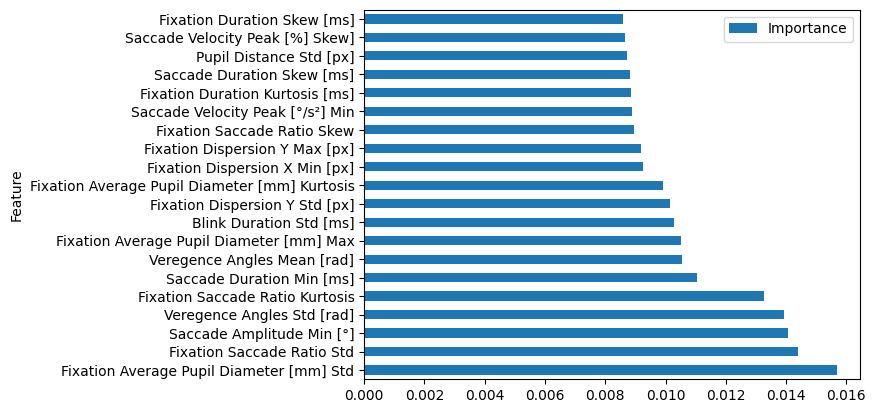

In [ ]:
df_importances.head(20).plot.barh(x='Feature', y='Importance')

In [ ]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['input1', 'input2']
svm = svm.SVC(kernel='linear')
svm.fit(X, Y)
f_importances(svm.coef_, features_names)

In [121]:
new_feature_names = ['Fixation Duration Mean', 'Fixation Duration Max', 'Fixation Duration Min', 'Fixation Duration Median', 'Fixation Duration Std', 'Fixation Duration Skew', 'Fixation Duration Quantil 25', 'Fixation Duration Quantil 75',
        'Saccade Duration Mean', 'Saccade Duration Max', 'Saccade Duration Min', 'Saccade Duration Median', 'Saccade Duration Std', 'Saccade Duration Skew', 'Saccade Duration Quantil 25', 'Saccade Duration Quantil 75', 
        'Blink Duration Mean', 'Blink Duration Max', 'Blink Duration Min', 'Blink Duration Median', 'Blink Duration Std', 'Blink Duration Skew', 'Blink Duration Quantil 25', 'Blink Duration Quantil 75', 'Fixation Duration Kurtosis',
        'Saccade Duration Kurtosis',
        'Blink Duration Kurtosis', 
        'Fixation Saccade Ratio Mean', 'Fixation Saccade Ratio Max', 'Fixation Saccade Ratio Min', 'Fixation Saccade Ratio Median', 'Fixation Saccade Ratio Std', 'Fixation Saccade Ratio Skew', 'Fixation Saccade Ratio Kurtosis', 
        'Fixation Number', 'Blink Number', 
        'Fixation Dispersion X Mean', 'Fixation Dispersion X Max', 'Fixation Dispersion X Min', 'Fixation Dispersion X Median', 'Fixation Dispersion X Std', 'Fixation Dispersion X Skew', 'Fixation Dispersion X Quantil 25', 'Fixation Dispersion X Quantil 75', 
        'Fixation Dispersion Y Mean', 'Fixation Dispersion Y Max', 'Fixation Dispersion Y Min', 'Fixation Dispersion Y Median', 'Fixation Dispersion Y Std', 'Fixation Dispersion Y Skew', 'Fixation Dispersion Y Quantil 25', 'Fixation Dispersion Y Quantil 75', 'Fixation Dispersion X Kurtosis', 'Fixation Dispersion Y Kurtosis', 
        'Saccade Amplitude Mean', 'Saccade Amplitude Max', 'Saccade Amplitude Min', 'Saccade Amplitude Median', 'Saccade Amplitude Std', 'Saccade Amplitude Skew', 'Saccade Amplitude Quantil 25', 'Saccade Amplitude Quantil 75', 'Saccade Amplitude Kurtosis',
        'Saccade Acceleration Average Mean', 'Saccade Acceleration Average Max', 'Saccade Acceleration Average Min', 'Saccade Acceleration Average Median', 'Saccade Acceleration Average Std', 'Saccade Acceleration Average Skew]', 'Saccade Acceleration Average Quantil 25', 'Saccade Acceleration Average Quantil 75',
        'Saccade Acceleration Peak Mean', 'Saccade Acceleration Peak Max', 'Saccade Acceleration Peak Min', 'Saccade Acceleration Peak Median', 'Saccade Acceleration Peak Std', 'Saccade Acceleration Peak Skew', 'Saccade Acceleration Peak Quantil 25', 'Saccade Acceleration Peak Quantil 75', 'Saccade Deceleration Peak Mean', 
        'Saccade Deceleration Peak Max', 'Saccade Deceleration Peak Min', 'Saccade Deceleration Peak Median', 'Saccade Deceleration Peak Std', 'Saccade Deceleration Peak Skew]', 'Saccade Deceleration Peak Quantil 25', 'Saccade Deceleration Peak Quantil 75', 
        'Saccade Velocity Average Mean', 'Saccade Velocity Average Max', 'Saccade Velocity Average Min', 'Saccade Velocity Average Median', 'Saccade Velocity Average Std', 'Saccade Velocity Average Skew', 'Saccade Velocity Average Quantil 25', 'Saccade Velocity Average Quantil 75', 
        'Saccade Velocity Peak  Mean', 'Saccade Velocity Peak Max', 'Saccade Velocity Peak Min', 'Saccade Velocity Peak Median', 'Saccade Velocity Peak Std', 'Saccade Velocity Peak Skew', 'Saccade Velocity Peak Quantil 25', 'Saccade Velocity Peak Quantil 75', 
        'Saccade Velocity Peak Prozent Mean', 'Saccade Velocity Peak Prozent Max', 'Saccade Velocity Peak Prozent Min', 'Saccade Velocity Peak Prozent Median', 'Saccade Velocity Peak Prozent Std', 'Saccade Velocity Peak Prozent Skew', 'Saccade Velocity Peak Prozent Quantil 25', 'Saccade Velocity Peak Prozent Quantil 75', 
        'Saccade Acceleration Average Kurtosis', 'Saccade Acceleration Peak Kurtosis', 'Saccade Deceleration Peak Kurtosis', 'Saccade Velocity Average Kurtosis', 'Saccade Velocity Peak Kurtosis', 'Saccade Velocity Peak Prozent Kurtosis', 
        'Saccade Length Mean', 'Saccade Length Max', 'Saccade Length Min', 'Saccade Length Median', 'Saccade Length Std', 'Saccade Length Skew', 'Saccade Length Quantil 25', 'Saccade Length Quantil 75', 'Saccade Length Kurtosis', 
        'Fixation Average Pupil Diameter Mean', 'Fixation Average Pupil Diameter Max', 'Fixation Average Pupil Diameter Min', 'Fixation Average Pupil Diameter Median', 'Fixation Average Pupil Diameter Std', 'Fixation Average Pupil Diameter Skew', 'Fixation Average Pupil Diameter Quantil25', 'Fixation Average Pupil Diameter Quantil75',
        'Fixation Average Pupil Diameter Kurtosis', 
        'Veregence Angles Mean', 'Veregence Angles Std', 
        'Pupil Distance Mean', 'Pupil Distance Std']

In [122]:
##################### Feature Importance SVC #####################

sgk = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=529)

fold = 0
data = []
### stratifies group k fold
for train_index, test_index in sgk.split(X, y, groups):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fit Model on Train
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    # model performance
    print(classification_report(y_test, y_pred))

    svm = pipe[-1]

    # making a pandas dataframe
    data.append(list(zip(new_feature_names,svm.coef_[0]))) #tupel
  
    fold += 1
    break


              precision    recall  f1-score   support

           0       0.46      0.68      0.55        78
           1       0.73      0.52      0.61       131

    accuracy                           0.58       209
   macro avg       0.59      0.60      0.58       209
weighted avg       0.63      0.58      0.58       209



In [123]:
# to get average of all folds
df = pd.DataFrame(data[0], columns=['Feature', 'Importance'])
for i in range(1,len(data)):
    fold = pd.DataFrame(data[i], columns=['Feature', 'Importance'])
    df = pd.concat([df, fold])

# to see feature importance
df_importances = df.groupby("Feature").mean().reset_index().sort_values(by='Importance', ascending=False)
df_importances
df_importances.head(20)

,Feature,Importance
112,Saccade Velocity Average Mean,4.892333
76,Saccade Amplitude Mean,4.860110
12,Fixation Average Pupil Diameter Mean,2.075939
62,Saccade Acceleration Average Quantil 75,1.755443
85,Saccade Deceleration Peak Mean,1.697922
126,Saccade Velocity Peak Prozent Mean,1.692270
74,Saccade Amplitude Kurtosis,1.640402
122,Saccade Velocity Peak Median,1.560467
64,Saccade Acceleration Average Std,1.528995
6,Blink Duration Quantil 75,1.473810


In [124]:
df_importances.tail(20)

,Feature,Importance
132,Saccade Velocity Peak Prozent Std,-0.906674
136,Saccade Velocity Peak Std,-0.921923
88,Saccade Deceleration Peak Quantil 25,-1.022614
78,Saccade Amplitude Min,-1.028817
94,Saccade Duration Mean,-1.089374
87,Saccade Deceleration Peak Min,-1.159010
11,Fixation Average Pupil Diameter Max,-1.232185
81,Saccade Amplitude Skew,-1.247454
77,Saccade Amplitude Median,-1.272871
115,Saccade Velocity Average Quantil 25,-1.303431


<AxesSubplot: ylabel='Feature'>

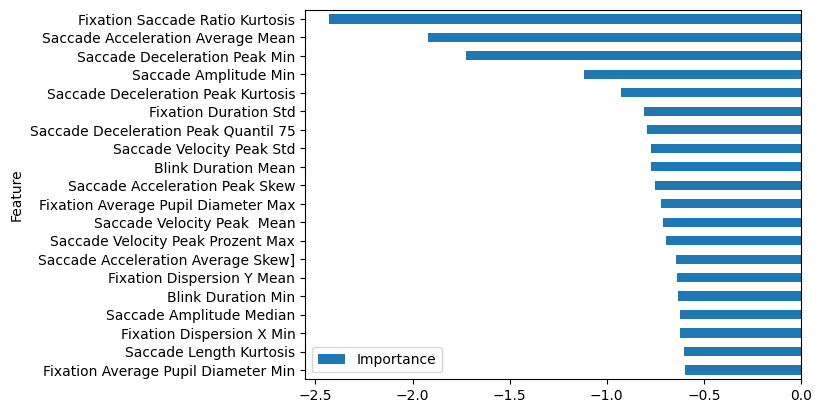

In [59]:
df_importances.tail(20).plot.barh(x='Feature', y='Importance')

In [ ]:
# new_feature_names = ['Fixation Duration Mean', 'Fixation Duration Max', 'Fixation Duration Min', 'Fixation Duration Median', 'Fixation Duration Std', 'Fixation Duration Skew', 'Fixation Duration Quantil 25', 'Fixation Duration Quantil 75',
#         'Saccade Duration Mean', 'Saccade Duration Max', 'Saccade Duration Min', 'Saccade Duration Median', 'Saccade Duration Std', 'Saccade Duration Skew', 'Saccade Duration Quantil 25', 'Saccade Duration Quantil 75', 
#         'Blink Duration Mean', 'Blink Duration Max', 'Blink Duration Min', 'Blink Duration Median', 'Blink Duration Std', 'Blink Duration Skew', 'Blink Duration Quantil 25', 'Blink Duration Quantil 75', 'Fixation Duration Kurtosis',
#         'Saccade Duration Kurtosis',
#         'Blink Duration Kurtosis', 
#         'Fixation Saccade Ratio Mean', 'Fixation Saccade Ratio Max', 'Fixation Saccade Ratio Min', 'Fixation Saccade Ratio Median', 'Fixation Saccade Ratio Std', 'Fixation Saccade Ratio Skew', 'Fixation Saccade Ratio Kurtosis', 
#         'Fixation Number', 'Blink Number', 
#         'Fixation Dispersion X Mean', 'Fixation Dispersion X Max', 'Fixation Dispersion X Min', 'Fixation Dispersion X Median', 'Fixation Dispersion X Std', 'Fixation Dispersion X Skew', 'Fixation Dispersion X Quantil 25', 'Fixation Dispersion X Quantil 75', 
#         'Fixation Dispersion Y Mean', 'Fixation Dispersion Y Max', 'Fixation Dispersion Y Min', 'Fixation Dispersion Y Median', 'Fixation Dispersion Y Std', 'Fixation Dispersion Y Skew', 'Fixation Dispersion Y Quantil 25', 'Fixation Dispersion Y Quantil 75', 'Fixation Dispersion X Kurtosis', 'Fixation Dispersion Y Kurtosis', 
#         'Saccade Amplitude Mean', 'Saccade Amplitude Max', 'Saccade Amplitude Min', 'Saccade Amplitude Median', 'Saccade Amplitude Std', 'Saccade Amplitude Skew', 'Saccade Amplitude Quantil 25', 'Saccade Amplitude Quantil 75', 'Saccade Amplitude Kurtosis',
#         'Saccade Acceleration Average Mean', 'Saccade Acceleration Average Max', 'Saccade Acceleration Average Min', 'Saccade Acceleration Average Median', 'Saccade Acceleration Average Std', 'Saccade Acceleration Average Skew]', 'Saccade Acceleration Average Quantil 25', 'Saccade Acceleration Average Quantil 75',
#         'Saccade Acceleration Peak Mean', 'Saccade Acceleration Peak Max', 'Saccade Acceleration Peak Min', 'Saccade Acceleration Peak Median', 'Saccade Acceleration Peak Std', 'Saccade Acceleration Peak Skew', 'Saccade Acceleration Peak Quantil 25', 'Saccade Acceleration Peak Quantil 75', 'Saccade Deceleration Peak Mean', 
#         'Saccade Deceleration Peak Max', 'Saccade Deceleration Peak Min', 'Saccade Deceleration Peak Median', 'Saccade Deceleration Peak Std', 'Saccade Deceleration Peak Skew]', 'Saccade Deceleration Peak Quantil 25', 'Saccade Deceleration Peak Quantil 75', 
#         'Saccade Velocity Average Mean', 'Saccade Velocity Average Max', 'Saccade Velocity Average Min', 'Saccade Velocity Average Median', 'Saccade Velocity Average Std', 'Saccade Velocity Average Skew', 'Saccade Velocity Average Quantil 25', 'Saccade Velocity Average Quantil 75', 
#         'Saccade Velocity Peak  Mean', 'Saccade Velocity Peak Max', 'Saccade Velocity Peak Min', 'Saccade Velocity Peak Median', 'Saccade Velocity Peak Std', 'Saccade Velocity Peak Skew', 'Saccade Velocity Peak Quantil 25', 'Saccade Velocity Peak Quantil 75', 
#         'Saccade Velocity Peak Prozent Mean', 'Saccade Velocity Peak Prozent Max', 'Saccade Velocity Peak Prozent Min', 'Saccade Velocity Peak Prozent Median', 'Saccade Velocity Peak Prozent Std', 'Saccade Velocity Peak Prozent Skew', 'Saccade Velocity Peak Prozent Quantil 25', 'Saccade Velocity Peak Prozent Quantil 75', 
#         'Saccade Acceleration Average Kurtosis', 'Saccade Acceleration Peak Kurtosis', 'Saccade Deceleration Peak Kurtosis', 'Saccade Velocity Average Kurtosis', 'Saccade Velocity Peak Kurtosis', 'Saccade Velocity Peak Prozent Kurtosis', 
#         'Saccade Length Mean', 'Saccade Length Max', 'Saccade Length Min', 'Saccade Length Median', 'Saccade Length Std', 'Saccade Length Skew', 'Saccade Length Quantil 25', 'Saccade Length Quantil 75', 'Saccade Length Kurtosis', 
#         'Fixation Average Pupil Diameter Mean', 'Fixation Average Pupil Diameter Max', 'Fixation Average Pupil Diameter Min', 'Fixation Average Pupil Diameter Median', 'Fixation Average Pupil Diameter Std', 'Fixation Average Pupil Diameter Skew', 'Fixation Average Pupil Diameter Quantil25', 'Fixation Average Pupil Diameter Quantil75',
#         'Fixation Average Pupil Diameter Kurtosis', 
#         'Veregence Angles Mean', 'Veregence Angles Std', 
#         'Pupil Distance Mean', 'Pupil Distance Std']
# for i in range(len(new_feature_names)):
#         new_feature_names[i] = new_feature_names[i].replace(" ","")

# new_feature_names
# X.set_axis(new_feature_names, axis=1, inplace=True)

In [61]:
########################### compare MW
df

,Feature,Importance
0,Fixation Duration Mean,0.134434
1,Fixation Duration Max,0.542763
2,Fixation Duration Min,-0.271851
3,Fixation Duration Median,-0.317495
4,Fixation Duration Std,-0.809606
...,...,...
134,Fixation Average Pupil Diameter Kurtosis,0.066914
135,Veregence Angles Mean,0.129518
136,Veregence Angles Std,-0.119982
137,Pupil Distance Mean,-0.052287


In [145]:
##################### preprocessing with pipleline #####################
from sklearn.feature_selection import SelectKBest, f_classif

imputer =  SimpleImputer(fill_value='missing')
scaler = StandardScaler()

# For classification: chi2, f_classif, mutual_info_classif

# 75 features we want to select
# reihenfolge nach SMOTE paper, selection vor smote
selector = SelectKBest(f_classif, k= 75)

# Balancing 
# over Sampling 
over = SMOTE(random_state= 4) 
#over = RandomOverSampler()

#weighted data (Small classes have higher weight)
#model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth = 3, n_estimators = 500, subsample = 1)
#model = RandomForestClassifier(random_state=3, class_weight="balanced")
#model = SVC(kernel= "linear", C = 0.004, gamma = 0.005, class_weight= "balanced" )
#model = SVC(kernel= "linear", C = 10, gamma = 1, class_weight= "balanced" )
#steps = [('imputer', imputer), ('scaler',scaler), ('model', model)]


# classifier getuned
#model = GaussianNB(var_smoothing=  1.5199110829529332e-05) 
#model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth = 3, n_estimators = 500, subsample = 1)
#auch gut
#model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth = 15, n_estimators = 220, learning_rate = 0.014, alpha = 0, reg_lambda = 1)
#model = RandomForestClassifier(random_state=3) #, bootstrap = True, max_depth = 50, max_features = 'auto',min_samples_leaf = 6, min_samples_split= 2, n_estimators = 200)

model = SVC(kernel= "linear", C = 10, gamma = 1) # {'model__C': 0.004, 'model__gamma': 0.1, 'model__kernel': 'rbf'}

steps = [('imputer', imputer), ('scaler',scaler),('selector',selector), ('over', over), ('model', model)]

selectBest_pipe = Pipeline(steps=steps)

In [146]:
##################### Feature seelction and imporatence #####################
from sklearn.metrics import precision_recall_curve, auc
from sklearn.utils import class_weight

sgk = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=529)

fold = 0
f1_scores = []
precision_scores = []
recall_scores = []
auc_pr_score = []
### stratifies group k fold
for train_index, test_index in sgk.split(X, y, groups):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # sample weights
    # sample_weights = class_weight.compute_sample_weight(class_weight = 'balanced',  y = y_train)
    # # Fit Model on Train
    # pipe.fit(X_train, y_train, **{'model__sample_weight': sample_weights})

    # Fit Model on Train
    selectBest_pipe.fit(X_train, y_train)

    y_pred = selectBest_pipe.predict(X_test)

    print(selectBest_pipe[-1].coef_)

    # to get dataframe with importance and name 
    names = X_train.columns.values[selector.get_support()]
    scores = selector.scores_[selector.get_support()]
    names_scores = list(zip(names, scores))
    df_best_features_with_score = pd.DataFrame(data = names_scores, columns=['Features', 'F_Scores'])
    #Sort the dataframe for better visualization
    df_best_features_with_score = df_best_features_with_score.sort_values(['F_Scores', 'Features'], ascending = [False, True])
    print(df_best_features_with_score)


    # new datafram ewith only the best features
    cols_idxs = selector.get_support(indices=True)
    df_best_features = X_test.iloc[:,cols_idxs]
    #print(df_best_features)

    # Calcualte different metrics
    # f1 score
    f1 = f1_score(y_test, y_pred, pos_label = 0)
    precision = precision_score(y_test, y_pred, pos_label = 0)
    recall = recall_score(y_test, y_pred, pos_label = 0)

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

    print(f"f1  score for fold {fold}: ", f1)
    print(f"recall for fold {fold}: ", recall)
    print(f"precision for fold {fold}: ", precision)

    # Precision- recall curve
    fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred)

    # calculate AUC-PR using the precision-recall curve
    auc_pr = auc( tpr,fpr) 
    auc_pr_score.append(auc_pr)

    print((f"auc for fold {fold}: ", auc_pr))
   
    fold += 1
    break

mean_auc = np.mean(auc_pr_score)
mean_f1 = np.mean(f1_scores)
mean_recall = np.mean(recall_scores)
mean_precision = np.mean(precision_scores)

print(f'Our mean fold f1 score is {mean_f1:0.4f}')
print(f'Our mean fold recall is {mean_recall:0.4f}')
print(f'Our mean fold precision is {mean_precision:0.4f}')
print(f'Our mean fold auc pr is {mean_auc:0.4f}')


[[  0.05671748   0.02549981   0.0392245    0.09724215   0.2291522
   -0.17815265  -0.27174132  -0.33283802   0.36212191  -0.17139954
    0.17962003  -0.11954756 -11.24511682   0.35171943  -0.22372251
    0.42185219  -0.28348652  -0.13675383  -0.25101444  -0.09411983
   -1.30291466  -0.37049168  -0.06317753   0.06428996   0.62413163
   -4.47839882  -0.86685719   0.39785825  -0.52773463   2.26449313
   -0.17619339   1.82251248   0.78333472  -0.22492104  -0.85219643
    0.9146104   -0.28228747  -0.50270995   0.11869162  -3.18506567
   -0.19310939  -1.21301236   0.27625215  -0.12936825   2.83766874
    1.10762488  -0.16457195   0.78066185  -1.78068261  -1.11065884
   -0.36251465  -1.16365615   1.26976479   0.88292427  -0.6379606
    0.6066072   -0.49268368   1.34616234  -1.00644206  -0.27979296
   -0.28998044   0.19786438  -0.65168321  -0.84773067   0.30953098
    0.20529409  -0.20851603   0.09303734   0.19857225  -0.24057829
   -0.73844727  -0.15854716   0.53219486  -0.18933623   0.049467

In [147]:
df_best_features

,Fixation Duration Min [ms],Fixation Duration Std [ms],Fixation Duration Skew [ms],Saccade Duration Max [ms],Saccade Duration Std [ms],Blink Duration Max [ms],Blink Duration Min [ms],Blink Duration Std [ms],Blink Duration Quantil 75 [ms],Fixation Duration Kurtosis [ms],...,Saccade Velocity Peak [%] Kurtosis,Saccade Length Max [px],Saccade Length Std [px],Saccade Length Skew [px]],Saccade Length Kurtosis [px],Fixation Average Pupil Diameter [mm] Max,Fixation Average Pupil Diameter [mm] Std,Fixation Average Pupil Diameter [mm] Quantil75,Veregence Angles Std [rad],Pupil Distance Std [px]
180,1873.7450,1011.718705,3.173523,56.0080,21.214495,316.0965,140.1370,97.468689,284.121250,10.331107,...,-1.097560,409.359982,276.729303,1.019967,-0.233616,0.271641,1.332215,-0.334359,0.012578,355.018021
181,151.9895,800.042298,1.230280,77.9780,15.190723,202.0885,110.0790,65.060541,179.086125,0.643214,...,2.686147,663.674985,248.028586,1.219855,0.968253,0.315141,0.057714,0.244266,0.009350,51.405672
182,132.0700,943.831847,1.606019,81.8875,16.892143,289.6475,113.9645,91.786011,194.323375,2.716543,...,2.345367,1144.758042,344.839091,2.077634,4.323120,0.564641,0.316681,0.454891,0.005061,257.319271
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,107.9430,868.559968,2.276932,59.9860,12.334705,252.0815,230.0860,12.292138,250.126500,3.917568,...,-1.140372,606.721482,202.365506,0.704152,-1.040127,-0.054961,0.127198,-0.130711,0.006715,70.026819
1023,85.9770,961.214162,2.220278,69.9070,14.725075,329.9055,235.9240,66.454956,306.410125,4.800117,...,-0.448982,895.862268,257.678741,2.035361,4.246652,-0.090961,0.065377,-0.204711,0.005560,58.771618
1024,101.9995,248.337427,1.136750,88.0785,16.569230,349.9165,146.0390,80.470759,287.878500,0.215747,...,-0.619014,1145.003742,298.250174,1.799903,3.185775,-0.225461,0.064668,-0.339586,0.008152,88.994922
1025,98.0240,223.867392,1.267630,85.9285,14.931760,259.9400,259.9400,NaN,259.940000,0.944152,...,-0.648045,1097.186009,276.851685,2.083199,3.903025,0.003039,0.133986,-0.134836,0.008049,36.298896


In [148]:
df_best_features_with_score

,Features,F_Scores
73,Veregence Angles Std [rad],10.152555
38,Saccade Deceleration Peak [°/s²] Mean,8.560988
41,Saccade Deceleration Peak [°/s²] Std,8.508311
61,Saccade Velocity Peak [%] Std,8.469369
7,Blink Duration Std [ms],8.180086
...,...,...
15,Fixation Dispersion X Median [px],0.965857
53,Saccade Velocity Peak [°/s²] Median,0.948839
21,Saccade Amplitude Median [°],0.943096
23,Saccade Amplitude Quantil 25 [°],0.910914


In [149]:
df_best_features_with_score.head(20)

,Features,F_Scores
73,Veregence Angles Std [rad],10.152555
38,Saccade Deceleration Peak [°/s²] Mean,8.560988
41,Saccade Deceleration Peak [°/s²] Std,8.508311
61,Saccade Velocity Peak [%] Std,8.469369
7,Blink Duration Std [ms],8.180086
54,Saccade Velocity Peak [°/s²] Std,7.860550
25,Saccade Acceleration Average [°/s²] Mean,7.688727
43,Saccade Deceleration Peak [°/s²] Quantil 25],7.368572
50,Saccade Velocity Peak [°/s²] Mean,7.263204
29,Saccade Acceleration Average [°/s²] Std,7.167826


In [144]:
df_best_features_with_score.tail(20)

,Feat_names,F_Scores
47,Saccade Velocity Average [°/s²] Median,1.337471
6,Blink Duration Min [ms],1.315676
9,Fixation Duration Kurtosis [ms],1.264215
36,Saccade Acceleration Peak [°/s²] Skew],1.260970
63,Saccade Deceleration Peak [°/s²] Kurtosis,1.258899
14,Blink Number,1.245705
65,Saccade Velocity Peak [%] Kurtosis,1.201339
2,Fixation Duration Skew [ms],1.192515
72,Fixation Average Pupil Diameter [mm] Quantil75,1.135945
24,Saccade Amplitude Quantil 75 [°],1.112870
